<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Phyton_kriging:2D variogram </font>
</div>

- **Fecha**: 2023/06/15
        
- **Objetivos**:  Generación del variograma 2D

- **Descripción** Para el variograma hace falta calcular las distancias entre los puntos 2D. Aquí se utiliza la funcion distance.cdist 
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html

- **Referencias**: -

- **Autores**: 
    - Luis Miguel Sánchez Brea

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

In [3]:
from matplotlib import rcParams

rcParams['figure.dpi'] = 100


In [4]:
from phyton_kriging import np, plt

from phyton_kriging.variogram_2D import theoretical
from phyton_kriging.variogram_2D import experimental
from phyton_kriging.standard_2D import kriging2D

from phyton_kriging.utils_math import nearest, nearest2

# Experimental function 



In [5]:
def f_signal(x, y, width=(1,2), sc=0, I0=0, kind=0):
    """Simulation of data

    Args:
        x (np.array): x_positions
        y (np.array): y_positions
        width (float,float): width of gauss function
        sc (float or np.array): random noise
        I0 (float or np.array): detector precision

    Returns:
        y (np.array): data.
    """
    

    match kind:
        case 0:
            z = x + y
        case 1:
            z = np.sin(2 * np.pi * x /width[0]) * np.sin(2 * np.pi * y / width[1]) + 0.33*x 
        case 2:
            z = np.sin(2 * np.pi * x / 0.5)
        case 3:
            z = 5*np.exp(-(x**2/(2*width[0]**2) + y**2/(2*width[1]**2)))
        case 4:
            z = np.cos(2 * np.pi * np.sqrt(x**2+y**2) / 1) 

    print(z.shape)

    z = z + sc * np.random.randn(*z.shape)
    z = z + 2 * I0 * (np.random.rand(*z.shape) - 0.5)

    return z

In [6]:
sc = .05
I0 = .0001
width = (2,1)

kind=1

num_x = num_y = 25
num_sensors = num_x * num_y

sensors = np.zeros((num_sensors, 4), dtype=float)
positions = np.zeros((num_sensors, 2), dtype=float)

x = -5 + 10 * np.random.rand(num_sensors)
y = -5 + 10 * np.random.rand(num_sensors)

x = np.linspace(-2, 2, num_x)
y = np.linspace(-2, 0, num_y)

X, Y = np.meshgrid(x, y)
x = X.flatten()
y = Y.flatten()

sensors[:, 0] = x
sensors[:, 1] = y
sensors[:, 2] = f_signal(x, y, width, sc, I0, kind=kind)
sensors[:, 3] = I0 * np.ones_like(x)

positions = np.zeros((num_sensors, 2), dtype=float)

positions[:, 0] = x
positions[:, 1] = y

(625,)


(25, 25)


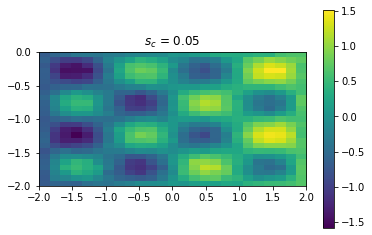

In [7]:
Signal = f_signal(X,Y,width=width, sc=sc, I0=I0, kind=kind)

plt.figure
plt.imshow(Signal, origin='lower', extent=[x[0], x[-1], y[0], y[-1]])

plt.title("$s_c$ = {:2.2f}".format(sc))
plt.colorbar()

In [54]:
hx_var = np.array([0.4, 1])
hy_var = np.array([0.4, 2])

print(hx_var)
print(hy_var)

[0.4 1. ]
[0.4 2. ]


In [55]:
var_2d = experimental(sensors=sensors)

In [56]:
variogram, num_data = var_2d.compute(hx_var, hy_var, remove_origin=False, has_draw=False)

In [57]:
print(variogram)
print(num_data)

[[0.2448 0.2736]
 [0.4711 0.4237]]
[[ 53100.  11275.]
 [108150.  23100.]]


In [44]:
print(np.sqrt(0.39))

0.6244997998398398


In [45]:
print(4/25)

0.16
